<a href="https://colab.research.google.com/github/ANAM-KHAN-1/Time-Series-Analysis/blob/main/Time_Series_Analysis_for_Revenue_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Time Series Analysis for Revenue Forecasting


## Objective
Forecast future revenue based on historical time series data using statistical and machine learning models.


## Dataset Overview
The dataset contains monthly or daily revenue data, which can be used to identify trends, seasonality, and forecast future values.


In [1]:
# Load packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np

## Workflow
1. Load and explore the dataset  
2. Visualize trends and seasonality  
3. Preprocess the time series data  
4. Apply time series forecasting models  
5. Evaluate model performance


In [6]:
from google.colab import files
uploaded = files.upload()


Saving time_data.csv to time_data.csv


In [7]:
import pandas as pd
import io

df = pd.read_csv(io.BytesIO(uploaded['time_data.csv']))


## Data Exploration and Visualization
Visualizing the revenue trend over time and decomposing the series into trend, seasonality, and residual components.


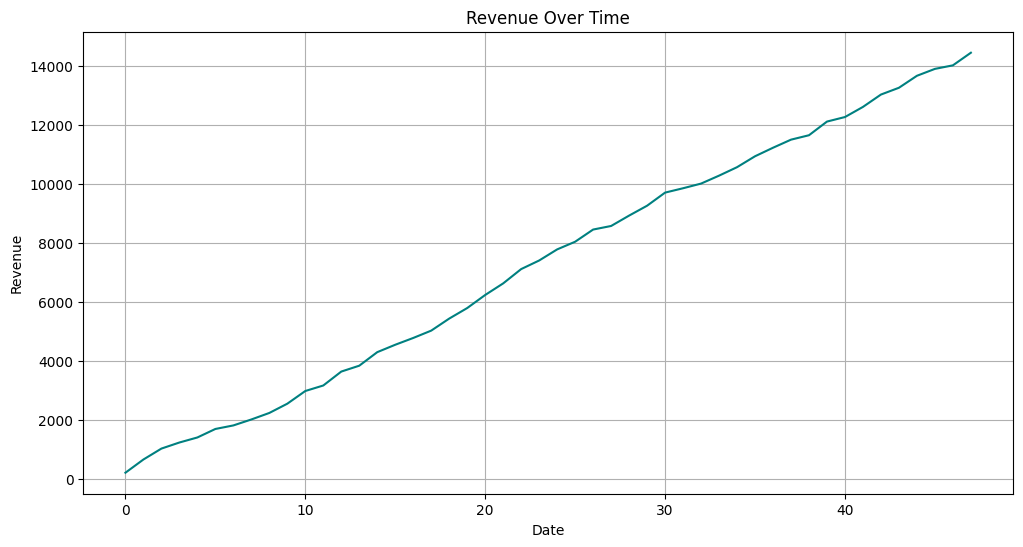

In [9]:
# Plot revenue over time
plt.figure(figsize=(12, 6))
plt.plot(df['Revenue'], color='teal')
plt.title('Revenue Over Time')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.grid(True)
plt.show()


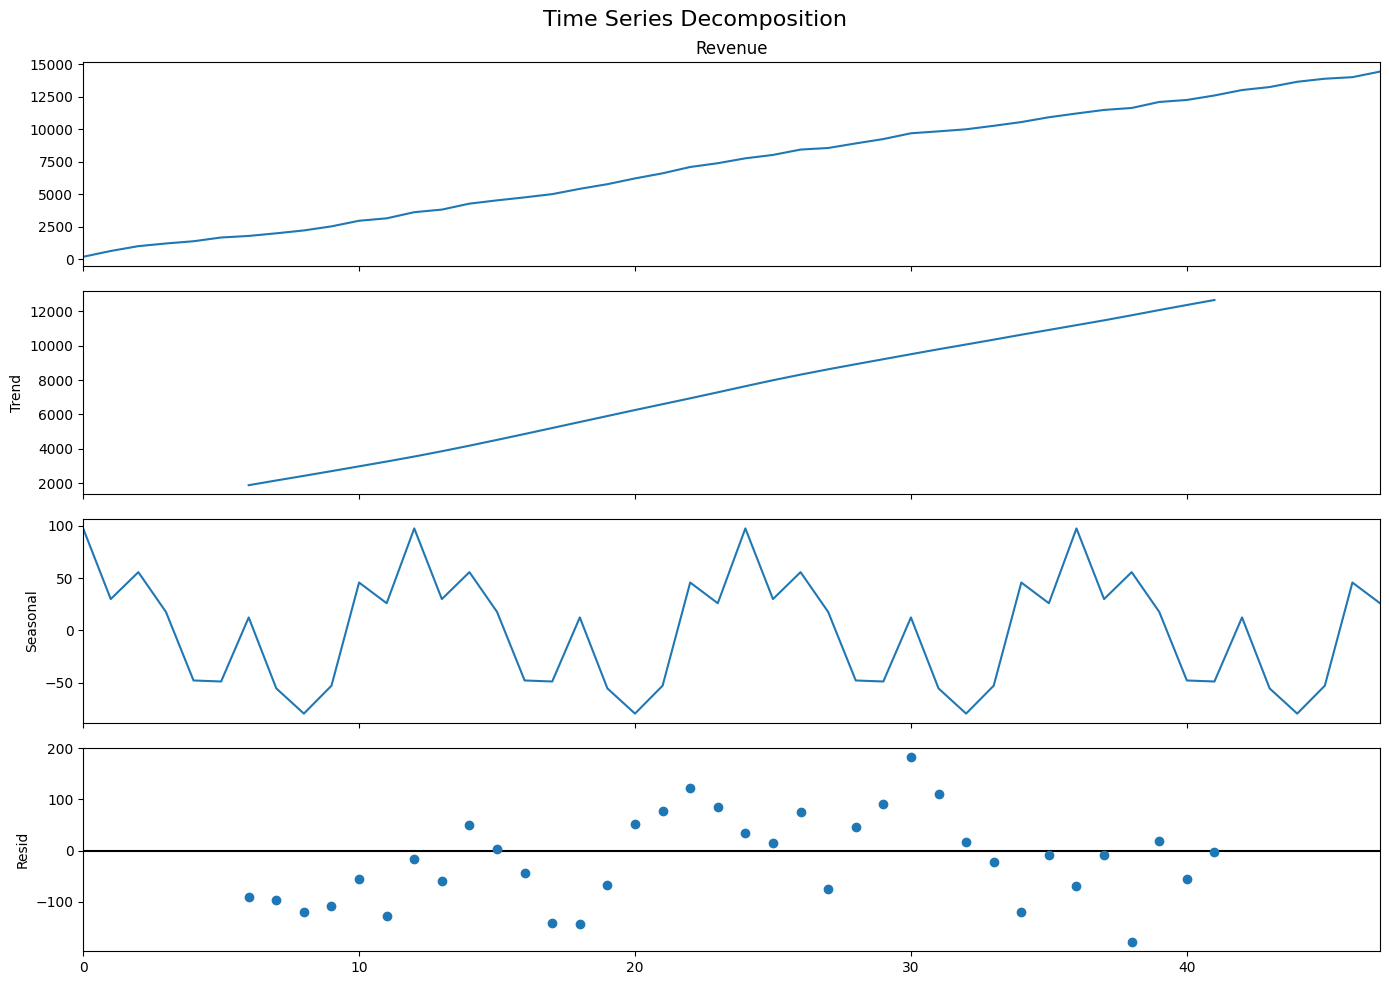

In [11]:
# Decomposition (assuming monthly frequency)
decomposition = seasonal_decompose(df['Revenue'], model='additive', period=12)

# Plot decomposition
fig = decomposition.plot()
fig.set_size_inches(14, 10)
plt.suptitle('Time Series Decomposition', fontsize=16)
plt.tight_layout()
plt.show()


## Model Training and Forecasting using ARIMA
Applying an ARIMA model to capture the temporal dependencies and forecast future revenue values.


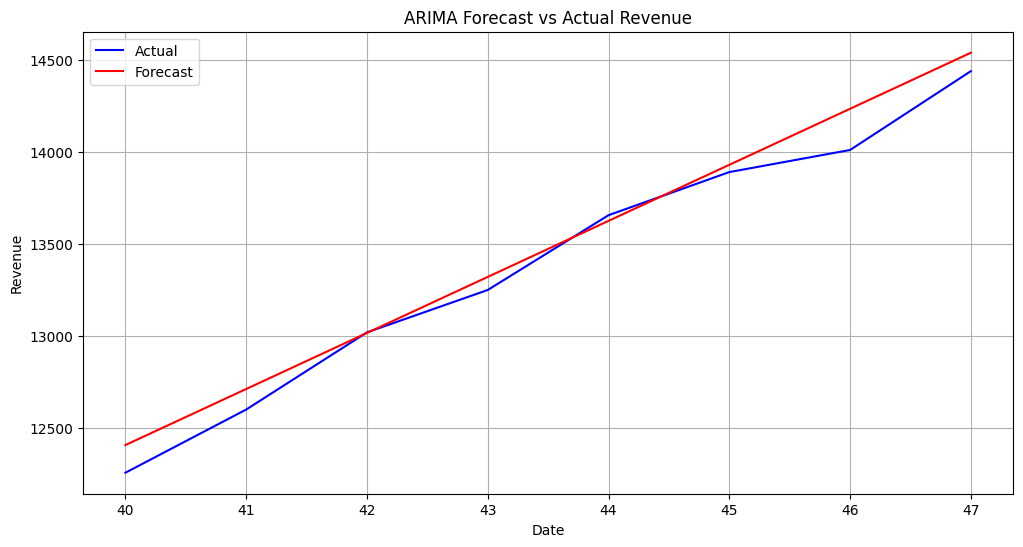

Mean Squared Error: 12822.27


In [13]:
# Train-Test Split
train_size = int(len(df) * 0.85)
train, test = df['Revenue'][:train_size], df['Revenue'][train_size:]

# Fit ARIMA model (you may need to tune p,d,q parameters)
model = ARIMA(train, order=(1, 1, 1))
model_fit = model.fit()

# Forecast
forecast = model_fit.forecast(steps=len(test))

# Plot actual vs forecast
plt.figure(figsize=(12, 6))
plt.plot(test.index, test, label='Actual', color='blue')
plt.plot(test.index, forecast, label='Forecast', color='red')
plt.title('ARIMA Forecast vs Actual Revenue')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.legend()
plt.grid(True)
plt.show()

# Evaluate model performance
mse = mean_squared_error(test, forecast)
print(f'Mean Squared Error: {mse:.2f}')


## Conclusion
- ARIMA was applied to forecast future revenue.  
- The model can be fine-tuned for better performance using grid search or other techniques.  
- You may explore advanced models like SARIMA or Prophet for improved accuracy.
